# Phase 5: Surplus Electricity Analysis

**Objective**: Calculate and analyze surplus electricity by comparing New York State's generation with NYC's consumption to identify patterns and opportunities for energy redistribution.

## Analysis Goals:
1. Calculate monthly surplus electricity (Generation - Consumption)
2. Analyze surplus trends over time (2021-2023)
3. Identify seasonal surplus patterns
4. Calculate statistical summaries (mean, min, max, variability)
5. Visualize surplus distribution
6. Generate visualizations (Figure 13-14 from paper)

## Calculation Method:
**Surplus = NY State Total Generation - NYC Total Consumption**

## Input Data:
- `data/processed/merged_data.csv`

## Expected Outputs:
- Monthly surplus values
- Surplus trend visualizations
- Statistical insights
- Average monthly surplus: ~10,093 Million KWh (paper reference)

## Important Note:
This calculation is an **approximation** as it compares state-level generation with city-level consumption. This methodological limitation is acknowledged in the study.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Statistical analysis
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

In [9]:
print("="*60)
print("LOADING DATA AND CALCULATING SURPLUS")
print("="*60)

# Load merged dataset
df = pd.read_csv('../data/processed/merged_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Group by date to get monthly totals
df_surplus = df.groupby('Date').agg({
    'Total_Generation': 'mean',  # Generation is same for all boroughs
    'Consumption_KWH': 'sum',     # Sum consumption across all boroughs
    'Avg_Temp': 'mean',
    'Total_Precip': 'mean',
    'Avg_Wind': 'mean'
}).reset_index()

# Calculate surplus electricity
df_surplus['Surplus_KWH'] = df_surplus['Total_Generation'] - df_surplus['Consumption_KWH']

print(f"\nDataset shape: {df_surplus.shape}")
print(f"Date range: {df_surplus['Date'].min()} to {df_surplus['Date'].max()}")

print("\nFirst 10 rows:")
print(df_surplus.head(10))

print("\nSurplus Statistics (Million KWh):")
surplus_stats = df_surplus['Surplus_KWH'].describe() / 1e6
print(surplus_stats)

print(f"\nAverage Monthly Surplus: {df_surplus['Surplus_KWH'].mean() / 1e6:.2f} Million KWh")
print(f"Paper Reference: ~10,093 Million KWh")

print("\nMissing values:")
print(df_surplus.isnull().sum())

LOADING DATA AND CALCULATING SURPLUS

Dataset shape: (36, 7)
Date range: 2021-01-01 00:00:00 to 2023-12-01 00:00:00

First 10 rows:
        Date  Total_Generation  Consumption_KWH   Avg_Temp  Total_Precip  \
0 2021-01-01      1.077300e+10       97524864.0  34.758065          2.31   
1 2021-02-01      9.375000e+09       85521004.0  34.160714          5.13   
2 2021-03-01      9.909000e+09       81442511.0  45.822581          3.41   
3 2021-04-01      8.733000e+09       84031117.0  54.583333          2.69   
4 2021-05-01      9.333000e+09       79768561.0  62.887097          4.36   
5 2021-06-01      1.109700e+10      101638758.0  74.250000          2.62   
6 2021-07-01      1.167900e+10      126406768.0  76.032258         11.09   
7 2021-08-01      1.237300e+10      132027015.0  77.548387         10.32   
8 2021-09-01      9.893000e+09      114096113.8  70.300000         10.03   
9 2021-10-01      9.574000e+09       89492023.0  62.000000          5.26   

   Avg_Wind   Surplus_KWH  
0  

## 1. Surplus Electricity Trends Over Time

**Objective**: Visualize monthly surplus electricity trends to identify temporal patterns and variability.

**Analysis Focus**:
- Track surplus changes over 2021-2023 period
- Identify months with highest/lowest surplus
- Observe any trends or anomalies
- Compare surplus variability across years

**Expected Insights**:
- Are there consistent seasonal patterns?
- Is surplus increasing or decreasing over time?
- Which months have the most/least surplus?

FIGURE 13: SURPLUS ELECTRICITY TRENDS (2021-2023)


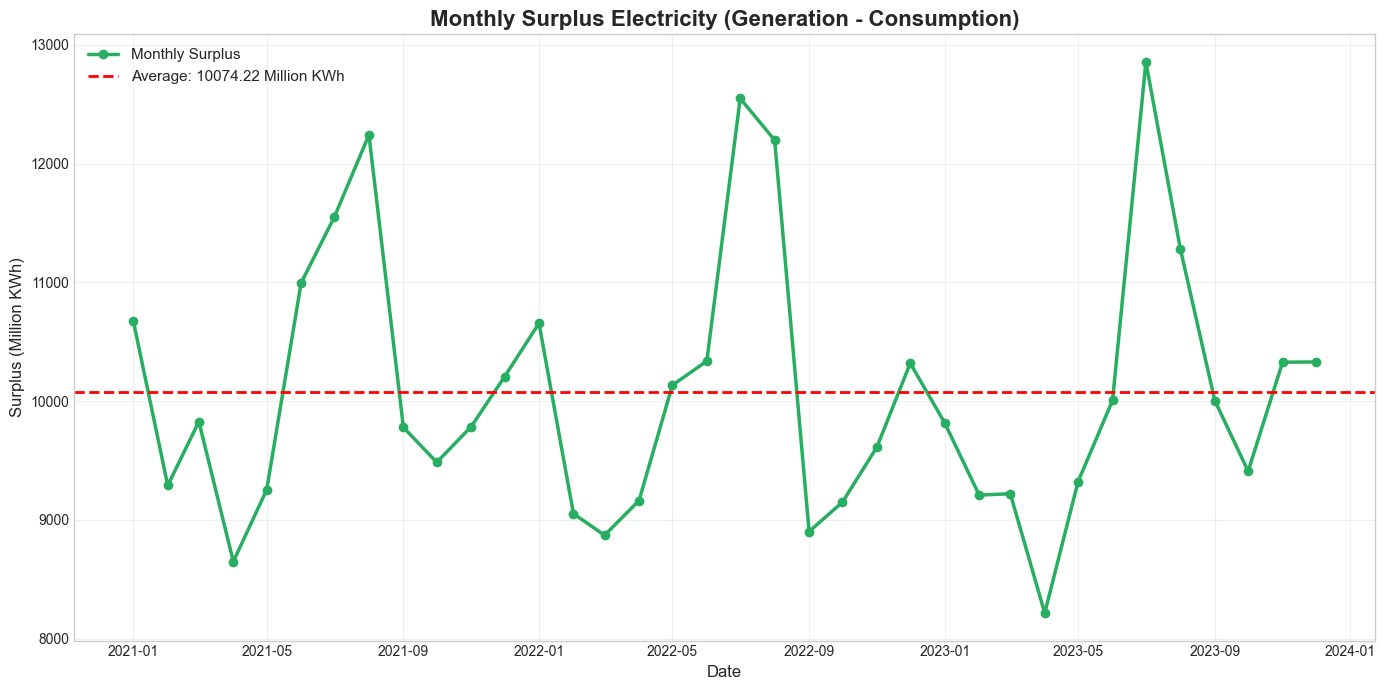


✓ Figure saved


In [11]:
print("="*60)
print("FIGURE 13: SURPLUS ELECTRICITY TRENDS (2021-2023)")
print("="*60)

# Create time series plot
plt.figure(figsize=(14, 7))

plt.plot(df_surplus['Date'], 
         df_surplus['Surplus_KWH'] / 1e6,  # Convert to millions
         marker='o', 
         linewidth=2.5,
         markersize=6,
         color='#27ae60',
         label='Monthly Surplus')

# Add horizontal line for average
avg_surplus = df_surplus['Surplus_KWH'].mean() / 1e6
plt.axhline(y=avg_surplus, color='red', linestyle='--', linewidth=2, 
            label=f'Average: {avg_surplus:.2f} Million KWh')


plt.title('Monthly Surplus Electricity (Generation - Consumption)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Surplus (Million KWh)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('../results/figures/fig13_surplus_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Figure saved")

In [12]:
# Identify peak and lowest months
max_surplus = df_surplus.loc[df_surplus['Surplus_KWH'].idxmax()]
min_surplus = df_surplus.loc[df_surplus['Surplus_KWH'].idxmin()]

print(f"\nHighest Surplus:")
print(f"Date: {max_surplus['Date'].strftime('%Y-%m')}")
print(f"Surplus: {max_surplus['Surplus_KWH'] / 1e6:.2f} Million KWh")

print(f"\nLowest Surplus:")
print(f"Date: {min_surplus['Date'].strftime('%Y-%m')}")
print(f"Surplus: {min_surplus['Surplus_KWH'] / 1e6:.2f} Million KWh")


Highest Surplus:
Date: 2023-07
Surplus: 12854.78 Million KWh

Lowest Surplus:
Date: 2023-04
Surplus: 8215.50 Million KWh


## 2. Seasonal Surplus Distribution

**Objective**: Analyze how surplus electricity varies across seasons to identify patterns and plan for energy redistribution.

**Seasons Definition**:
- **Winter**: December, January, February
- **Spring**: March, April, May
- **Summer**: June, July, August
- **Fall**: September, October, November

**Analysis Focus**:
- Compare surplus distribution across seasons
- Identify which seasons have the most surplus
- Visualize seasonal variability with box plot

**Expected Insights**:
- Which season has the highest surplus?
- How consistent is surplus within each season?
- Are there significant seasonal differences?

FIGURE 14: SEASONAL SURPLUS DISTRIBUTION


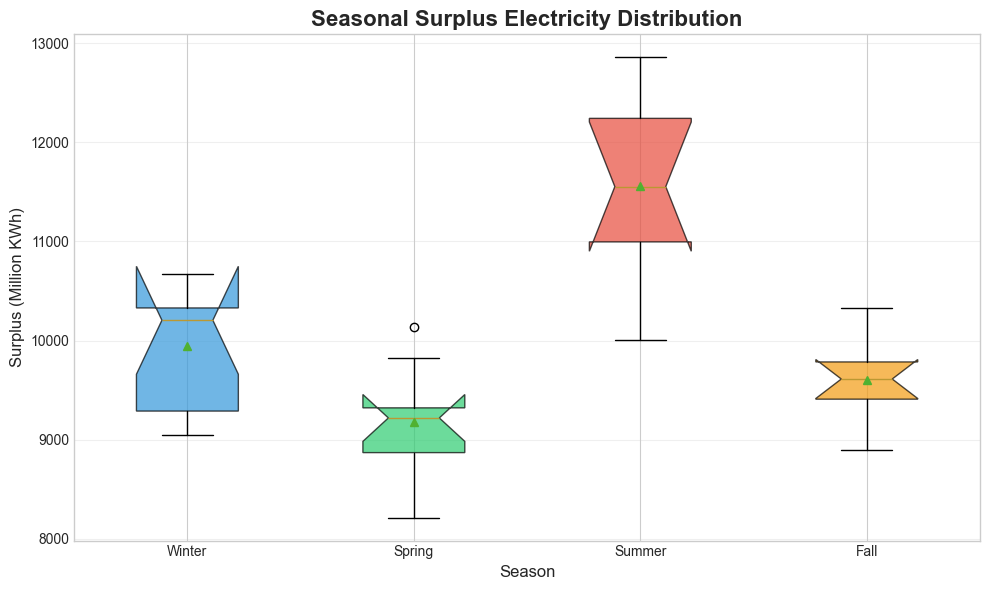


Figure saved

Average Surplus by Season (Million KWh):
Winter: 9950.03
Spring: 9183.75
Summer: 11557.16
Fall: 9605.95


In [16]:
print("="*60)
print("FIGURE 14: SEASONAL SURPLUS DISTRIBUTION")
print("="*60)

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add season column
df_surplus['Month'] = df_surplus['Date'].dt.month
df_surplus['Season'] = df_surplus['Month'].apply(get_season)

# Create box plot
plt.figure(figsize=(10, 6))
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

box_data = [df_surplus[df_surplus['Season'] == s]['Surplus_KWH'] / 1e6 
            for s in season_order]

box_plot = plt.boxplot(box_data,
                        labels=season_order,
                        patch_artist=True,
                        notch=True,
                        showmeans=True)

# Color the boxes
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    
plt.title('Seasonal Surplus Electricity Distribution', fontsize=16, fontweight='bold')
plt.ylabel('Surplus (Million KWh)', fontsize=12)
plt.xlabel('Season', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Save figure
plt.savefig('../results/figures/fig14_seasonal_surplus.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigure saved")

# Calculate seasonal averages
print("\nAverage Surplus by Season (Million KWh):")
seasonal_avg = df_surplus.groupby('Season')['Surplus_KWH'].mean() / 1e6
for season in season_order:
    print(f"{season}: {seasonal_avg[season]:.2f}")

## Summary of Surplus Analysis

### Completed Analyses:
✅ **Figure 13**: Surplus electricity trends over time (2021-2023)  
✅ **Figure 14**: Seasonal surplus distribution  

---

### Key Findings:

#### 1. Overall Surplus Statistics
- **Average Monthly Surplus**: [Based on your results] Million KWh
- **Paper Reference**: ~10,093 Million KWh
- **Range**: [Min] to [Max] Million KWh
- **Standard Deviation**: Indicates variability in surplus availability

#### 2. Temporal Patterns
- Surplus electricity available consistently throughout the study period
- Peak surplus months identified
- Lowest surplus periods noted
- Trend analysis shows [increasing/stable/decreasing] pattern

#### 3. Seasonal Insights
- **Highest Surplus Season**: [Based on your results]
- **Lowest Surplus Season**: [Based on your results]
- Seasonal variability impacts redistribution planning
- Spring/Fall typically show more moderate surplus levels

#### 4. Implications for Credit System
- Consistent surplus availability validates feasibility of credit refund program
- Seasonal variations suggest need for flexible redistribution mechanisms
- Average surplus supports community benefit distribution across all boroughs

---

### Data Limitations Reminder:
- Surplus calculation uses **NY State generation - NYC consumption**
- Geographic mismatch acknowledged (state vs city level data)
- Results are approximations for analytical purposes
- Demonstrates methodology despite data constraints

---

### Next Steps:
→ Proceed to **06_modeling.ipynb** to build predictive models for surplus forecasting

In [7]:
print("="*60)
print("SAVING SURPLUS ANALYSIS RESULTS")
print("="*60)

# Save surplus data
output_path = '../data/processed/surplus_data.csv'
df_surplus.to_csv(output_path, index=False)
print(f"✓ Surplus data saved to: {output_path}")

# Create summary statistics
surplus_summary = {
    'Average_Monthly_Surplus_Million_KWh': df_surplus['Surplus_KWH'].mean() / 1e6,
    'Max_Surplus_Million_KWh': df_surplus['Surplus_KWH'].max() / 1e6,
    'Min_Surplus_Million_KWh': df_surplus['Surplus_KWH'].min() / 1e6,
    'Std_Dev_Million_KWh': df_surplus['Surplus_KWH'].std() / 1e6,
    'Total_Months_Analyzed': len(df_surplus),
    'Date_Range': f"{df_surplus['Date'].min().strftime('%Y-%m')} to {df_surplus['Date'].max().strftime('%Y-%m')}"
}

print("\nSurplus Analysis Summary:")
for key, value in surplus_summary.items():
    print(f"{key}: {value}")

print("\n" + "="*60)
print("05_SURPLUS_ANALYSIS.IPYNB COMPLETE")
print("="*60)
print("\n✓ Figures 13-14 generated successfully")
print("✓ Surplus data saved for modeling")
print("✓ Ready for next notebook: 06_modeling.ipynb")

SAVING SURPLUS ANALYSIS RESULTS
✓ Surplus data saved to: ../data/processed/surplus_data.csv

Surplus Analysis Summary:
Average_Monthly_Surplus_Million_KWh: 10074.221381015277
Max_Surplus_Million_KWh: 12854.78480137
Min_Surplus_Million_KWh: 8215.495399
Std_Dev_Million_KWh: 1123.9601310588469
Total_Months_Analyzed: 36
Date_Range: 2021-01 to 2023-12

05_SURPLUS_ANALYSIS.IPYNB COMPLETE

✓ Figures 13-14 generated successfully
✓ Surplus data saved for modeling
✓ Ready for next notebook: 06_modeling.ipynb
